In [45]:
library(dplyr)
library(cluster)
library(Rtsne)
library(ggplot2)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'cluster' was built under R version 3.3.3"Warning message:
"package 'Rtsne' was built under R version 3.3.3"

In [2]:
LendingClub <- read.csv("CleanedLoanDataset.csv")

In [ ]:
#str(LendingClubLoan)

In [1]:
#colnames(LendingClub)

In [37]:
LendingClub$credit_history=LendingClub$last_credit_pull_year-LendingClub$earliest_cr_line_year

In [53]:
LendingClubLoan_Clustering <- dplyr:: select(LendingClub, loan_amnt,state, ficoMean, inq_last_6mths, purpose_num,installment,
                                             dti,loan_status_num)


In [54]:
LendingClubLoan_Clustering <- LendingClubLoan_Clustering[sample(1:nrow(LendingClubLoan_Clustering),
                                                                5000, replace=FALSE), ]

In [182]:
#str(LendingClubLoan_Clustering)

In [55]:
gower_dist <- daisy(LendingClubLoan_Clustering, metric = "gower")

In [56]:
summary(gower_dist)

12497500 dissimilarities, summarized :
     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0012879 0.1385400 0.1813100 0.1865100 0.2286600 0.6514100 
Metric :  mixed ;  Types = I, I, I, I, I, I, I, I 
Number of objects : 5000

In [57]:
gower_mat <- as.matrix(gower_dist)

In [58]:
LendingClubLoan_Clustering[
  which(gower_mat == min(gower_mat[gower_mat != min(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

,loan_amnt,state,ficoMean,inq_last_6mths,purpose_num,installment,dti,loan_status_num
1319572,15000,5,747,0,6,476.93,27.73,1
678382,15000,5,747,0,6,469.29,27.33,1


In [59]:
LendingClubLoan_Clustering[
  which(gower_mat == max(gower_mat[gower_mat != max(gower_mat)]),
        arr.ind = TRUE)[1, ], ]

,loan_amnt,state,ficoMean,inq_last_6mths,purpose_num,installment,dti,loan_status_num
42397,8550,10,642,4,3,305.77,8.84,9
1246489,35000,36,747,0,12,1230.33,32.11,1


In [60]:
sil_width <- c(NA)
sil_width

[1] NA

In [61]:
for(i in 2:10){
  pam_fit <- pam(gower_dist,
                 diss = TRUE,
                 k = i)
  
  sil_width[i] <- pam_fit$silinfo$avg.width
  
}
#sil_width

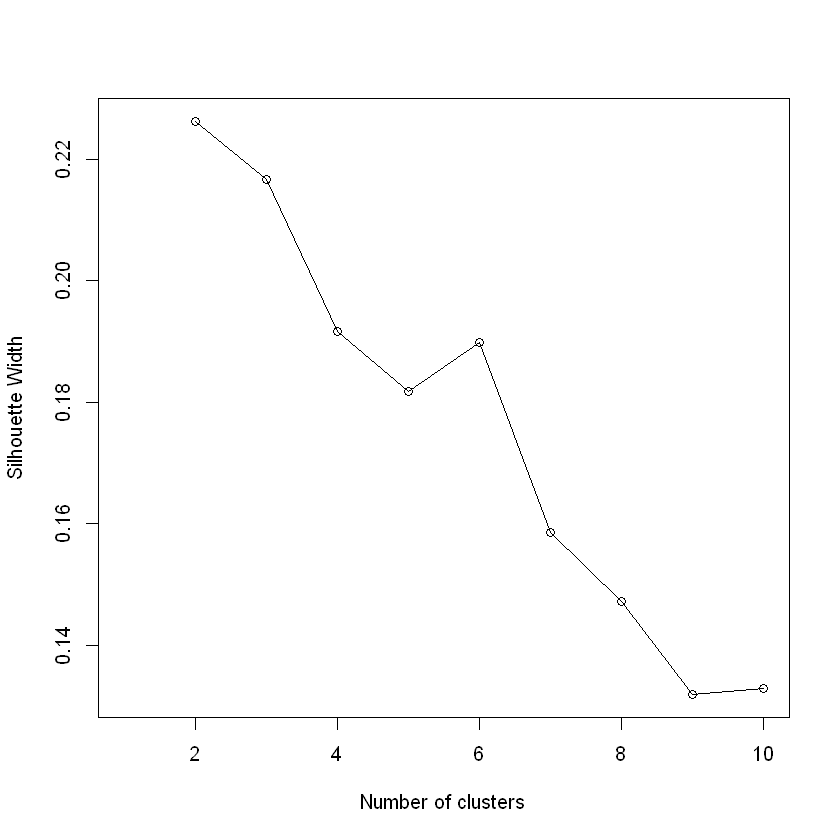

In [62]:
plot(1:10, sil_width,
     xlab = "Number of clusters",
     ylab = "Silhouette Width")
lines(1:10, sil_width)

In [63]:
pam_fit <- pam(gower_dist, diss = TRUE, k = 2)

In [64]:
pam_results <- LendingClubLoan_Clustering %>%
  mutate(cluster = pam_fit$clustering) %>%
  group_by(cluster) %>%
  do(the_summary = summary(.))

In [77]:
#group_by(cluster)

In [77]:
#pam_results$the_summary

In [65]:
LendingClubLoan_Clustering[pam_fit$medoids, ]

,loan_amnt,state,ficoMean,inq_last_6mths,purpose_num,installment,dti,loan_status_num
1176515,14000,35,692,0,6,461.60,19.47,1
1319611,12000,7,687,0,6,352.15,18.62,1


In [66]:
tsne_obj <- Rtsne(gower_dist, is_distance = TRUE)

In [67]:
tsne_data <- tsne_obj$Y %>%
  data.frame() %>%
  setNames(c("X", "Y")) %>%
  mutate(cluster = factor(pam_fit$clustering))

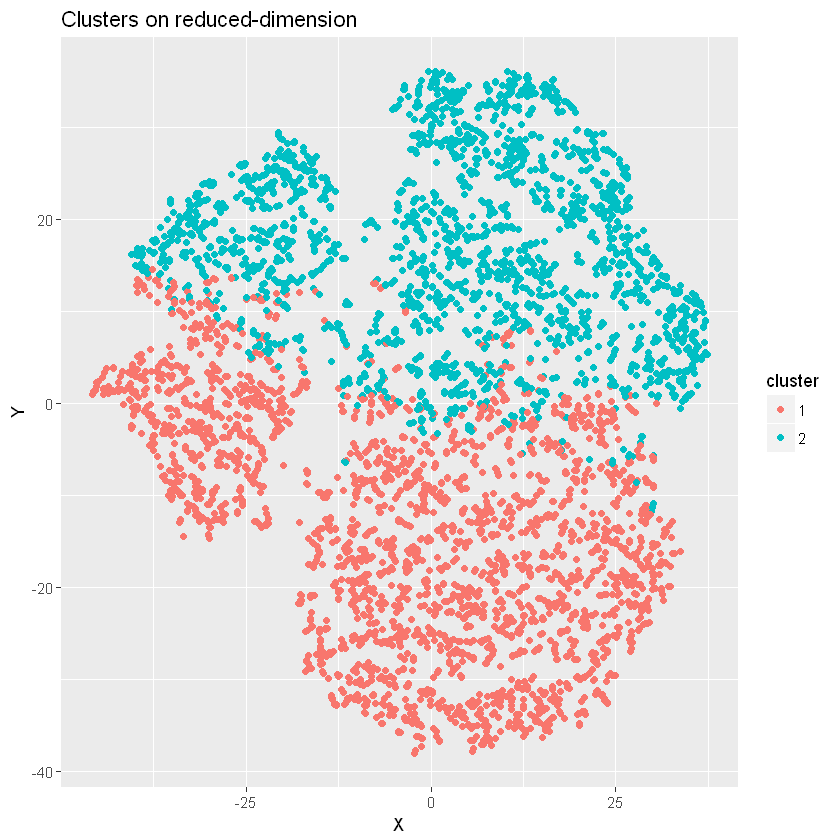

In [68]:
ggplot(aes(x = X, y = Y), data = tsne_data) +
  geom_point(aes(color = cluster)) +
  ggtitle("Clusters on reduced-dimension")